In [ ]:
! pip install yellowbrick

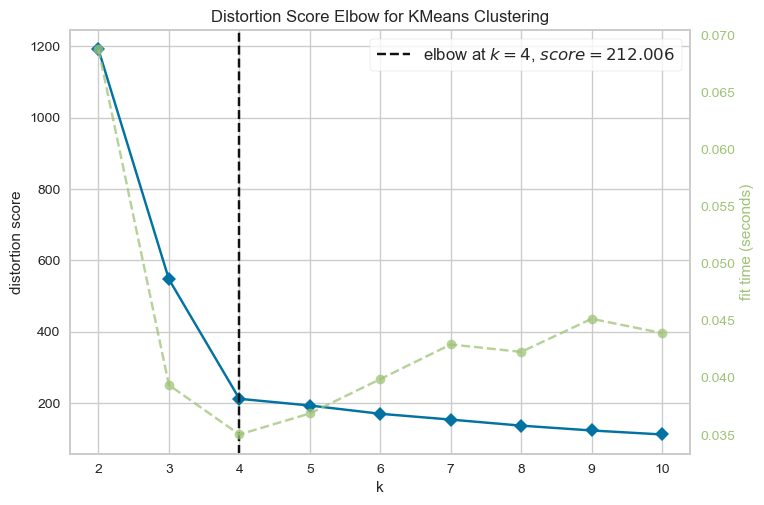

[[75  0  0  0]
 [ 0 75  0  0]
 [ 0  0  0 75]
 [ 0  0 75  0]]


In [26]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import confusion_matrix

# Generate sample data with true cluster labels
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

# Create the KMeans model
model = KMeans(n_init=10)

# Use the KElbowVisualizer to determine the optimal K
visualizer = KElbowVisualizer(model, k=(2, 11))
visualizer.fit(X)

# Visualize the elbow plot
visualizer.show()

optimal_k = visualizer.elbow_value_ 

# Fit K-Means model with the manually selected optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
kmeans.fit(X)

# Get cluster assignments
cluster_labels = kmeans.labels_

# Calculate and visualize the confusion matrix
confusion_mat = confusion_matrix(y_true, cluster_labels)

# Print or visualize the confusion matrix as needed
print(confusion_mat)